<a href="https://colab.research.google.com/github/this-1s-sparta/tn4/blob/main/MNIST_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

# Setting Environment Seeds

Seeds enable the reproduction of the experiments.

In [ ]:
random.seed(0)
np.random.seed(seed=0)
tf.random.set_seed(seed=0)

# Load MNIST Dataset using Tensorflow

In [ ]:
(x_train, y_train), (x_test, y_test ) = tf.keras.datasets.mnist.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

print(
    f'Training Size - Inputs:{x_train.shape}, Targets:{y_train.shape}'
    f'\nTest Size - Inputs:{x_test.shape}, Targets:{y_test.shape}'
)

Training Size - Inputs:(60000, 28, 28), Targets:(60000,)
Test Size - Inputs:(10000, 28, 28), Targets:(10000,)


# Displaying Random Digits

In [ ]:
rows = 5
digits_per_row = 5

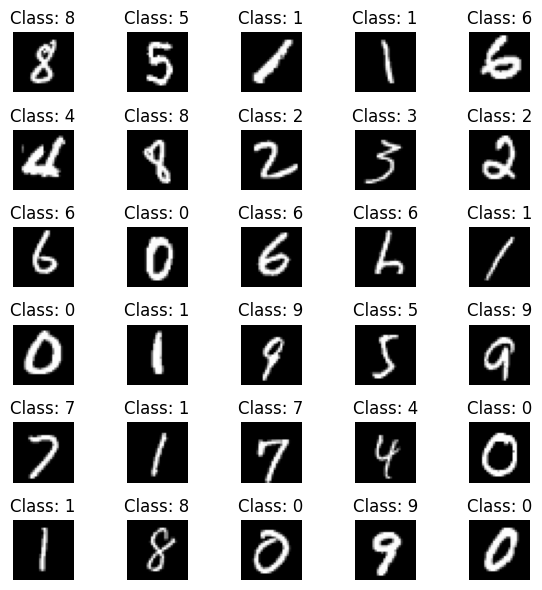

In [ ]:
fig, axes = plt.subplots(nrows=rows, ncols=digits_per_row, figsize=(6, 6))
axes = axes.flatten()

# Selecting random ids from 0 to 60000
total_digits = rows*digits_per_row
random_ids= np.random.choice(x_train.shape[0], total_digits, replace=False)

# Plotting the selected digits.
for i, ax in enumerate(axes):
    idx = random_ids[i]
    ax.imshow(x_train[idx], cmap='gray')
    ax.set_title(f'Class: {y_train[idx]}')
    ax.axis('off')
plt.tight_layout()
plt.show()

# Preprocessing Inputs


*   Deep Neural Networks require vectors are inputs. Since the digits are 28x28
*   One-hot Encoding is required for targets, since we use 10 classes. (e.g. 0 will be classified as 0 0 0 0 0 0 0 0 0 1, one will be classified as 0 0 0 0 0 0 0 0 1 0, etc.

grayscale images, they should be converted to vectors of 784 size.

In [ ]:
x_train = x_train.reshape((60000, 784))
y_train = tf.one_hot(y_train, depth=10)
x_test = x_test.reshape((10000, 784))
y_test = tf.one_hot(y_test, depth=10)

print(
    f'Training Size - Inputs:{x_train.shape}, Targets:{y_train.shape}'
    f'\nTest Size - Inputs:{x_test.shape}, Targets:{y_test.shape}'
)

Training Size - Inputs:(60000, 784), Targets:(60000, 10)
Test Size - Inputs:(10000, 784), Targets:(10000, 10)


# Construct Deep Neural Network





*   Input: 784 Features
*   Hiddens: 2 Hiddens of 256 units, which pass through tanh activation.
*   Output: 10 probabilities (1 for each class). Softmax activation is required to convert the network's outputs into probabilities.



In [ ]:
activation = 'tanh'
loss = 'categorical_crossentropy' # Do not change this loss function.
metrics = ['accuracy']
learning_rate = 0.001
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate) # Do not change this optimizer.
epochs = 10

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(784,), name='input'),
    tf.keras.layers.Dense(units=256, activation=activation, name='hidden-1'),
    tf.keras.layers.Dense(units=256, activation=activation, name='hidden-2'),
    tf.keras.layers.Dense(units=10, activation='softmax', name='outputs') # Do not change this activation function.
])
model.summary(expand_nested=True)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden-1 (Dense)            (None, 256)               200960    
                                                                 
 hidden-2 (Dense)            (None, 256)               65792     
                                                                 
 outputs (Dense)             (None, 10)                2570      
                                                                 
Total params: 269322 (1.03 MB)
Trainable params: 269322 (1.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
history = model.fit(
    x=x_train,
    y=y_train,
    epochs=epochs,
    validation_data=(x_test, y_test)
)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.9650 - accuracy: 0.7258 - val_loss: 0.5434 - val_accuracy: 0.8580
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4776 - accuracy: 0.8706 - val_loss: 0.4080 - val_accuracy: 0.8865
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3831 - accuracy: 0.8931 - val_loss: 0.3501 - val_accuracy: 0.9060
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3376 - accuracy: 0.9046 - val_loss: 0.3123 - val_accuracy: 0.9111
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3066 - accuracy: 0.9119 - val_loss: 0.2885 - val_accuracy: 0.9166
Epoch 6/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2823 - accuracy: 0.9190 - val_loss: 0.2781 - val_accuracy: 0.9215
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2674 - accuracy: 0.9230 - val_loss: 0.2603 - val_ac

# Display Loss and Accuracy per Training Epoch

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

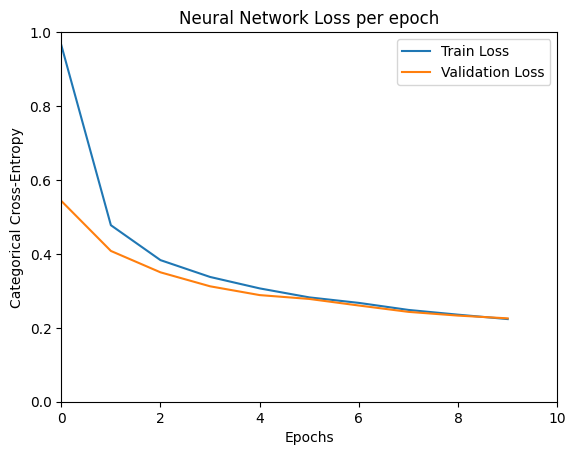

In [ ]:
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Neural Network Loss per epoch')
plt.ylabel('Categorical Cross-Entropy')
plt.xlabel('Epochs')
plt.xlim(0, epochs)
plt.ylim(0, 1)
plt.legend()
plt.show()

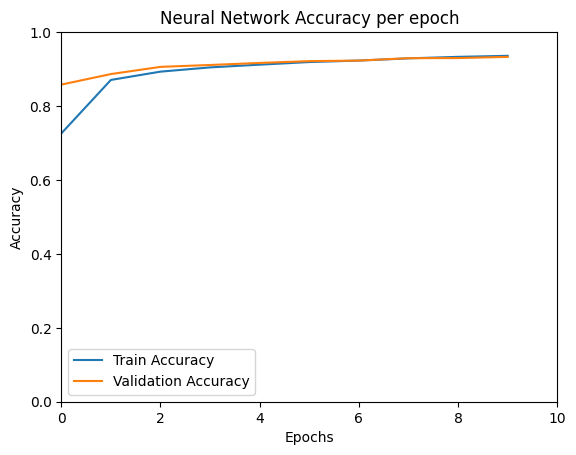

In [ ]:
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Neural Network Accuracy per epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.xlim(0, epochs)
plt.ylim(0, 1)
plt.legend()
plt.show()

# --- TODOs ---

## 1. Hyperparameter Tuning: Try adjusting number of hidden layers, hidden units, activation function, learning rate, number of epochs, etc.


In [ ]:
activation_fn = 'relu'
learning_rate = 0.001
epochs = 20
m = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(784,), name='input_layer'),
    tf.keras.layers.Dense(512, activation=activation_fn, name='layer_1'),
    tf.keras.layers.Dense(256, activation=activation_fn, name='layer_2'),
    tf.keras.layers.Dense(128, activation=activation_fn, name='layer_3'),
    tf.keras.layers.Dense(10, activation='softmax', name='output_layer')
])
m.summary()
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
m.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
# Train
history = m.fit(
    x=x_train,
    y=y_train,
    epochs=epochs,
    validation_data=(x_test, y_test)
)

## 2. Validation: Show 1 misclassified digit from each class.

In [ ]:
p = model.predict(x_test)
p_labels = np.argmax(p, axis=1)
t_labels = np.argmax(y_test.numpy(), axis=1)
misc = np.where(p_labels != t_labels)[0]
samples = {}
target_classes = set(range(10))
index_pointer = 0
while len(samples) < 10 and index_pointer < len(misc):
    idx = misc[index_pointer]
    label = t_labels[idx]
    if label not in samples:
        samples[label] = idx
    index_pointer += 1
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.flatten()
for i, label in enumerate(sorted(samples)):
    idx = samples[label]
    axes[i].imshow(x_test[idx].reshape(28, 28), cmap='gray')
    axes[i].set_title(f'True: {t_labels[idx]}, Pred: {p_labels[idx]}')
    axes[i].axis('off')
plt.tight_layout()
plt.show()

## 3. Suggest & Implement workflow improvements, aside hyperparameter tuning. Can you think of any ways to increase the overall accuracy of the Neural Network?

In [ ]:
# Βελτιωμένο μοντέλο με normalization και dropout
x_train = x_train / 255.0
x_test = x_test / 255.0
from tensorflow.keras.layers import Dense, Dropout
model_improved = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(784,), name='input'),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])
model_improved.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model_improved.summary()
history_improved = model_improved.fit(
    x=x_train,
    y=y_train,
    epochs=20,
    validation_data=(x_test, y_test)
)

## 4. Upload the exercise in your GitHub repository. Google Colab can instantly deploy this notebook into a Github repository.

## 5. Write a README file in your github repository, explaining:

1. Your workflow
2. The final model architecture
3. The selected hyperparameters
4. Include the requirements.txt file, which shows the python version, as well as the library versions.

In [ ]:
!pip show tensorflow

Name: tensorflow
Version: 2.15.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tf_keras
